- *Nombre Alumno/a*: 
- *Asignatura*: Ingeniería del Conocimiento
- *Curso*: 2022/2023
- *Profesor*: Fco. Javier Martínez de Pisón
- Universidad de La Rioja

# Proyecto 2. Diseño de DSS en Industria 4.0 (Parte 1/3)

En este ejemplo, vamos a utlizar Python para profundizar en el desarrollo de modelos predictivos que puedan ser usados en una planta de galvanizado de bobinas de acero.

En este proyecto se pretende tener una experiencia cercana a aspectos propios de la Industria 4.0 como el Big Data (visto más como el machine learning) y la Simulación.

![Industria 4.0](https://blog.wearedrew.co/hubfs/Industria-4-0.gif)

---

- Ver Video:
    - *Industria 4 0 - Explicado Fácilmente (Transformación Digital)*: https://www.youtube.com/watch?v=Qb7twp03c58&t=1570s

---



## Objetivos de la Práctica

**El objetivo en este proyecto consiste en desarrollar modelos que puedan ser utilizados para controlar y optimizar el proceso de recocido de una línea de galvanizado en continuo de bobinas de acero (línea de subida de la curva de recocido).**


El proceso de extracción, captura de la información y selección dentro de las miles de variables ha sido realizado previamente. En nuestro caso, trabajaremos con una base de datos ya reducida y limpia, preparada para un contexto de aprendizaje. Esta Base de Datos está modificada para conservar la confidencialidad con la empresa.

---

- Ver Video:
    - *El proceso de obtención de bobinas de acero*: https://www.youtube.com/watch?v=ea19TPj5vzA

---

Para ello, se desarrollará un informe en PDF, como si fuera a ser presentado a la empresa, incluyendo en él todo el código usado, las gráficas, así como un análisis exhaustivo de todos los pasos realizados.

Los modelos a realizar serán:

1. Caso A: Modelos de predicción de la temperatura de consigna del horno en la zona 1 del horno (THC1, THC3 y THC5) según la temperatura de entrada de la banda, la temperatura a la que debe salir la banda, la velocidad de la banda, las dimensiones de la banda de acero y el tipo de acero de la misma.
2. Caso B: Modelo de predicción que permita predecir la temperatura de la banda de acero cuando sale del horno (TMPP2) según las temperaturas del horno (THC1, THC3 y THC5), la temperatura de entrada de la banda de acero (TMPP1), la velocidad de la banda (VELMED), dimensiones y tipo de acero.

La nota final del trabajo tendrá en cuenta los siguientes factores: **grado de profundidad de las explicaciones, técnicas usadas, aspecto visual y organización del documento presentado**.

El trabajo se debe llamar así: PROYECTO2_NOMBRE_ALUMNO.PDF (por ejemplo: PROYECTO2_PEPITO_PEREZ.PDF) y se enviará directamente en la plataforma Blackboard. 

**Nota: todos los trabajos serán revisados automáticamente con herramientas anti-plagio como: SafeAssign y Turnitin. Los alumnos que plagien sus trabajos, obtendrán calificación 0 en la asignatura.**

![](https://slideplayer.es/slide/13167045/79/images/7/RECOCIDO.jpg)

In [1]:
# Importamos paquetes basicos
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [ ]:
# # Usa todo el ancho del navegador
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Inserta imagenes en la celda a medida que se crean
%matplotlib inline

## Cargamos la Base de Datos

In [3]:
!wget https://github.com/IC1920/Datasets/raw/master/DATOS_HORNO_ENTRENA.arff -O DATOS_HORNO_ENTRENA.arff
!wget https://github.com/IC1920/Datasets/raw/master/DATOS_HORNO_TESTEO.arff -O DATOS_HORNO_TESTEO.arff

--2023-04-18 15:07:10--  https://github.com/IC1920/Datasets/raw/master/DATOS_HORNO_ENTRENA.arff
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IC1920/Datasets/master/DATOS_HORNO_ENTRENA.arff [following]
--2023-04-18 15:07:10--  https://raw.githubusercontent.com/IC1920/Datasets/master/DATOS_HORNO_ENTRENA.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125832 (123K) [text/plain]
Saving to: ‘DATOS_HORNO_ENTRENA.arff’

DATOS_HORNO_ENTRENA 100%[===================>] 122.88K  --.-KB/s    in 0.02s   

2023-04-18 15:07:10 (7.49 MB/s) - ‘DATOS_HORNO_ENTRENA.arff’ saved [125832/125832]

--2023-04-18

In [4]:
# Leemos los archivos arff
df_train = pd.DataFrame(arff.loadarff("DATOS_HORNO_ENTRENA.arff")[0])
df_test = pd.DataFrame(arff.loadarff("DATOS_HORNO_TESTEO.arff")[0])

In [5]:
df_train.head()

,CODBOB,CLASACERO,ANCHO,ESPESOR,LARGO,PESO,VELMED,TMPP1,TMPP2,TMPP2CNG,THC1,THC3,THC5
0,23293006.0,b'B011F97',1250.0,0.6,3683.0,21770.0,145.0,212.0,754.0,750.0,770.0,800.0,821.0
1,23293007.0,b'B011F97',1250.0,0.6,3040.0,18070.0,145.0,210.0,749.0,750.0,772.0,801.0,822.0
2,23293008.0,b'B011F97',1250.0,0.6,3605.0,21420.0,138.0,211.0,761.0,770.0,778.0,808.0,833.0
3,23293009.0,b'B011F97',1250.0,0.6,903.0,5330.0,145.0,221.0,755.0,750.0,758.0,788.0,811.0
4,23293010.0,b'B011F97',1250.0,0.6,2540.0,15030.0,105.0,223.0,752.0,750.0,752.0,783.0,806.0


Vemos que al leer nos han incluido un caracter 'b' en el código de la bobina y comillas simples. Procedemos a decodificarlo como formato *utf-8*.

In [6]:
# Convertimos la variable CLASACERO a utf-8
df_train['CLASACERO'] = df_train['CLASACERO'].str.decode('utf-8')
df_test['CLASACERO'] = df_test['CLASACERO'].str.decode('utf-8')
df_train.head()

,CODBOB,CLASACERO,ANCHO,ESPESOR,LARGO,PESO,VELMED,TMPP1,TMPP2,TMPP2CNG,THC1,THC3,THC5
0,23293006.0,B011F97,1250.0,0.6,3683.0,21770.0,145.0,212.0,754.0,750.0,770.0,800.0,821.0
1,23293007.0,B011F97,1250.0,0.6,3040.0,18070.0,145.0,210.0,749.0,750.0,772.0,801.0,822.0
2,23293008.0,B011F97,1250.0,0.6,3605.0,21420.0,138.0,211.0,761.0,770.0,778.0,808.0,833.0
3,23293009.0,B011F97,1250.0,0.6,903.0,5330.0,145.0,221.0,755.0,750.0,758.0,788.0,811.0
4,23293010.0,B011F97,1250.0,0.6,2540.0,15030.0,105.0,223.0,752.0,750.0,752.0,783.0,806.0


La descripción de las variables de la base de datos es la siguiente:

-	CODBOB: Código de la bobina.
-	CLASACERO: Tipo de acero.
-	ANCHO: Ancho medio de la banda de acero. (mm)
-	ESPESOR: Espesor medio de la banda de acero. (mm).
-	LARGO: Largo medio de la banda de acero. (m).
-	PESO: Peso medio de la bobina. (Kg*10).
-	VELMED: Velocidad media de la banda de acero en el horno. (m/min)
-	TMPP1: Temperatura media de la banda de acero a la entrada del horno. (ºC)
-	TMPP2: Temperatura media de la banda de acero a la salida del horno. (ºC)
-	TMPP2CNG: Temperatura media objetivo que debería tener la banda de acero a la salida del horno. (ºC)
-	THC1: Temperatura media de consigna en la zona 1 del Horno. (ºC)
-	THC3: Temperatura media de consigna en la zona 3 del Horno. (ºC).
-	THC5: Temperatura media de consigna en la zona 5 del Horno. (ºC)

En este caso, los valores de temperatura del horno, de la banda de acero y de velocidad de la misma corresponden con los valores medios obtenidos para cada una de las bobinas.


In [ ]:
df_test.head()

,CODBOB,CLASACERO,ANCHO,ESPESOR,LARGO,PESO,VELMED,TMPP1,TMPP2,TMPP2CNG,THC1,THC3,THC5
0,23633053.0,B105F55,1040.0,0.7,3491.0,19780.0,136.0,256.0,851.0,850.0,858.0,888.0,914.0
1,23633054.0,B105F55,1040.0,0.7,3240.0,18370.0,140.0,258.0,850.0,850.0,860.0,890.0,914.0
2,23633055.0,B105F55,1040.0,0.7,3047.0,17160.0,140.0,260.0,850.0,850.0,860.0,890.0,914.0
3,23633056.0,B105F55,1040.0,0.7,3513.0,19980.0,139.0,263.0,842.0,840.0,854.0,884.0,906.0
4,23643001.0,B100F55,1062.0,0.7,2949.0,17050.0,139.0,253.0,829.0,825.0,847.0,877.0,895.0


In [ ]:
np.unique(df_train['CLASACERO']) #para ver cuantos tipos de acero hay

array(['B011B99', 'B011F97', 'B012B97', 'B012F53', 'B012F55', 'B013B55',
       'B013C55', 'B014F53', 'B016F35', 'B023H53', 'B025F55', 'B032H53',
       'B042H53', 'B044H53', 'B081B99', 'B085F97', 'B085G99', 'B100B95',
       'B100F33', 'B100F55', 'B101F55', 'B102G33', 'B102G55', 'B103G33',
       'B103G55', 'B105F55', 'B120G55', 'C107G55', 'C114G55', 'C115G55',
       'C116G55', 'D012F55', 'D012G99', 'D031B33', 'D032F55', 'D071F55',
       'D094B33', 'D094G55', 'K011B55', 'K011F57', 'K021H43', 'K021H53',
       'K022H53', 'N013H53', 'N017B97', 'X100G99'], dtype=object)

También convertimos el código de la bobina a entero.

In [ ]:
df_train['CODBOB'] = df_train['CODBOB'].astype(int)
df_test['CODBOB'] = df_test['CODBOB'].astype(int)

display(df_train.head(3), df_test.head(3))

,CODBOB,CLASACERO,ANCHO,ESPESOR,LARGO,PESO,VELMED,TMPP1,TMPP2,TMPP2CNG,THC1,THC3,THC5
0,23293006,B011F97,1250.0,0.6,3683.0,21770.0,145.0,212.0,754.0,750.0,770.0,800.0,821.0
1,23293007,B011F97,1250.0,0.6,3040.0,18070.0,145.0,210.0,749.0,750.0,772.0,801.0,822.0
2,23293008,B011F97,1250.0,0.6,3605.0,21420.0,138.0,211.0,761.0,770.0,778.0,808.0,833.0


,CODBOB,CLASACERO,ANCHO,ESPESOR,LARGO,PESO,VELMED,TMPP1,TMPP2,TMPP2CNG,THC1,THC3,THC5
0,23633053,B105F55,1040.0,0.7,3491.0,19780.0,136.0,256.0,851.0,850.0,858.0,888.0,914.0
1,23633054,B105F55,1040.0,0.7,3240.0,18370.0,140.0,258.0,850.0,850.0,860.0,890.0,914.0
2,23633055,B105F55,1040.0,0.7,3047.0,17160.0,140.0,260.0,850.0,850.0,860.0,890.0,914.0


In [ ]:
df_train.shape, df_test.shape #Tamaño final de las bases de datos

((1898, 13), (81, 13))

## Análisis Exploratorio de Datos (AED)

**EJERCICIO: Siguiendo los pasos aprendidos en el Proyecto 1 realice un AED de los datos visualizando cada una de las variables**

- Utilice todos los métodos de estadística descriptiva vistos en clase (*Funciones_AED_Python.ipynb*) para analizar la información. Extraiga también estimaciones robustas de centralidad y dispersión.
- Dibuje las series temporales usando la función *dibuja_proceso()*.
- Analice la distribución de los datos para cada una de las características usando barplots, histogramas, density-plots y diagramas de cajas (boxplots).
- Con toda la información anterior, estudie si hay espurios o datos faltantes. Si es así, realice correcciones en los datos.
- Desarrolle un análisis de distribución normal de cada variable usando gráficos Cuantil-Cuantil (QQPlots), pruebas de normalidad así como estadísticos de asimetría (kurtosis, skewness).
- Analice la relación entre las variables con pair-plots y matrices de correlación.
- Estudie las correlaciones de cada variable de entrada con las de salida.

In [ ]:
df_train.describe()

,CODBOB,ANCHO,ESPESOR,LARGO,PESO,VELMED,TMPP1,TMPP2,TMPP2CNG,THC1,THC3,THC5
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,2.346880e+07,1175.884615,0.888298,2392.461538,17488.838778,108.591675,249.407798,807.407798,806.642782,815.469442,845.613277,865.016860
std,9.847295e+04,197.816664,0.348482,1044.062929,5014.451152,46.984315,19.790073,32.183468,32.415592,37.621038,38.236909,39.908894
min,2.329301e+07,750.000000,0.430000,350.000000,1380.000000,30.000000,200.000000,715.000000,725.000000,702.000000,734.000000,734.000000
25%,2.338304e+07,1000.000000,0.650000,1631.250000,14140.000000,87.000000,234.000000,790.000000,783.000000,795.000000,825.000000,840.000000
50%,2.346307e+07,1220.000000,0.770000,2186.500000,18695.000000,113.000000,250.000000,821.000000,825.000000,824.500000,854.000000,874.000000
75%,2.355304e+07,1301.000000,1.170000,3102.750000,21380.000000,125.000000,265.000000,826.000000,825.000000,844.000000,875.000000,894.000000
max,2.363305e+07,1525.000000,2.000000,5538.000000,26340.000000,999.000000,300.000000,867.000000,861.000000,877.000000,907.000000,932.000000


<Axes: >

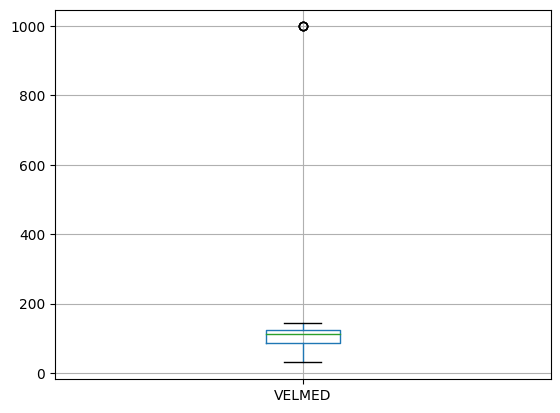

In [ ]:
df_train.boxplot('VELMED')

<Axes: xlabel='VELMED', ylabel='Count'>

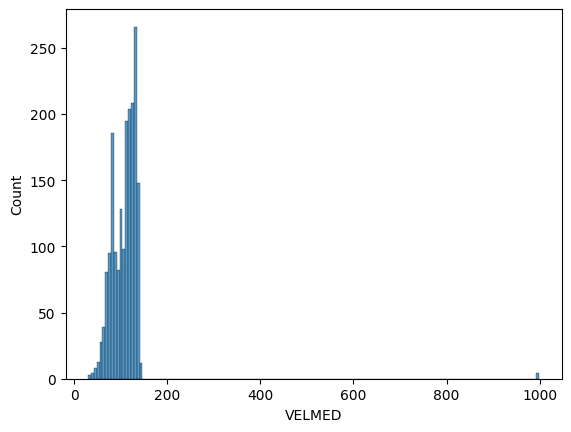

In [ ]:
sns.histplot(df_train['VELMED'], stat='count')

In [ ]:
def dibuja_proceso(df, pos_ini = 0, num_bobs = None):
    if num_bobs==None:
        num_bobs = len(df)
    # Dibuja Espesor y Ancho con dos ejes
    # -----------------------------------
    df_plot = df.iloc[pos_ini:pos_ini+num_bobs]

    fig, ax = plt.subplots(constrained_layout=True, figsize=(10,4))
    ax.plot(df_plot['ESPESOR'], label='ESPESOR')
    ax.set_xlabel('Num. Bobina')
    ax.set_ylabel('Espesor (mm.)')
    # Segundo eje
    ax.plot(df_plot['ANCHO']/1000.0, label='ANCHO')
    def CtoF(x):
        return x * 1000.0
    def FtoC(x):
        return x / 1000.0

    secaxy = ax.secondary_yaxis('right', functions=(CtoF, FtoC))
    secaxy.set_ylabel('Ancho (mm.)')
    ax.legend()

    # Dibuja Temperaturas y Velocidad con dos ejes
    # -----------------------------------
    fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6))
    for colname in df_plot.columns[7:]:
        ax.plot(df_plot[colname], label=colname)

    ax.set_xlabel('Num. Bobina')
    ax.set_ylabel('Temperaturas (ºC)')

    ax.plot(df_plot['VELMED']*3.0, label='VELMED')
    def CtoF(x):
        return x / 3.0
    def FtoC(x):
        return x * 3.0

    secaxy = ax.secondary_yaxis('right', functions=(CtoF, FtoC))
    secaxy.set_ylabel('Velocidad Media (m/min)')
    ax.legend()


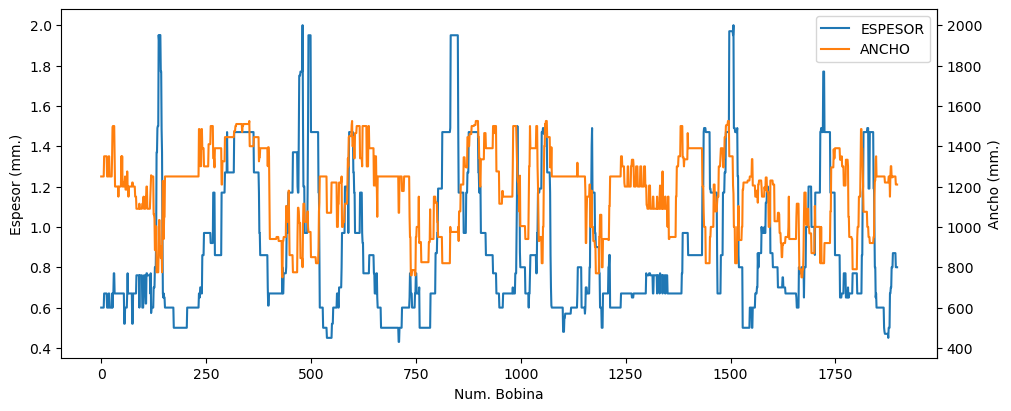

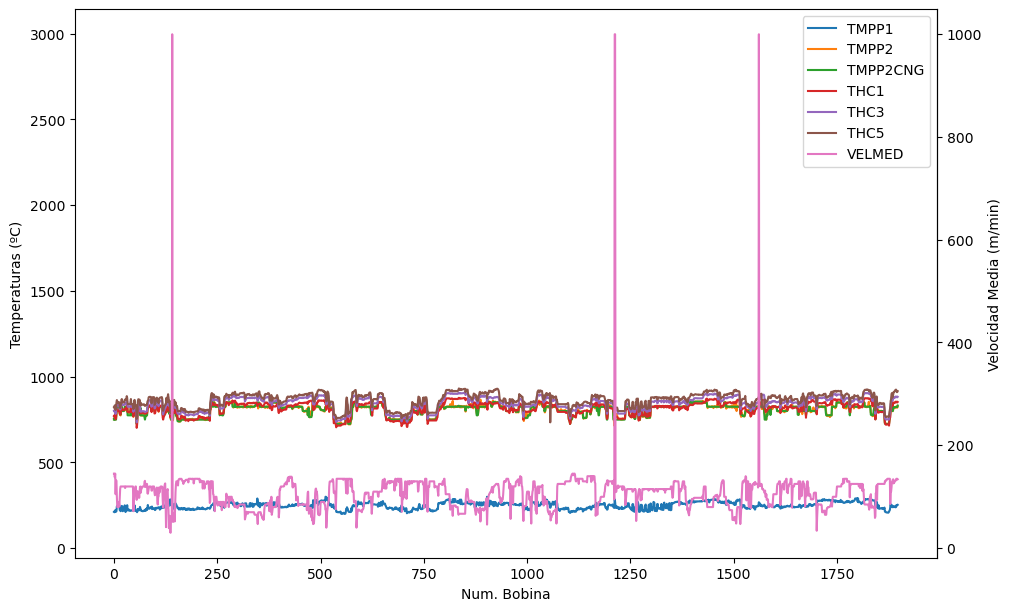

In [ ]:
dibuja_proceso(df_train)

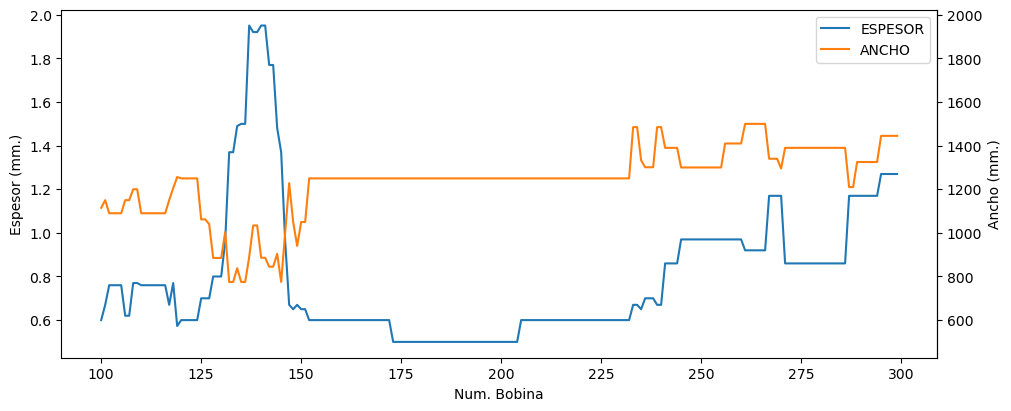

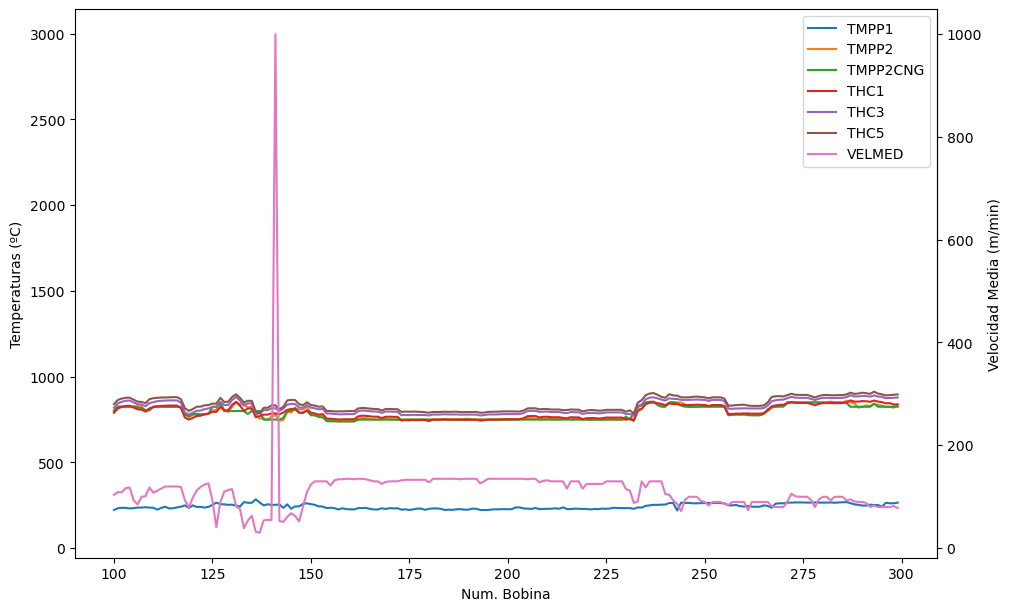

In [ ]:
dibuja_proceso(df_train, pos_ini=100, num_bobs=200)

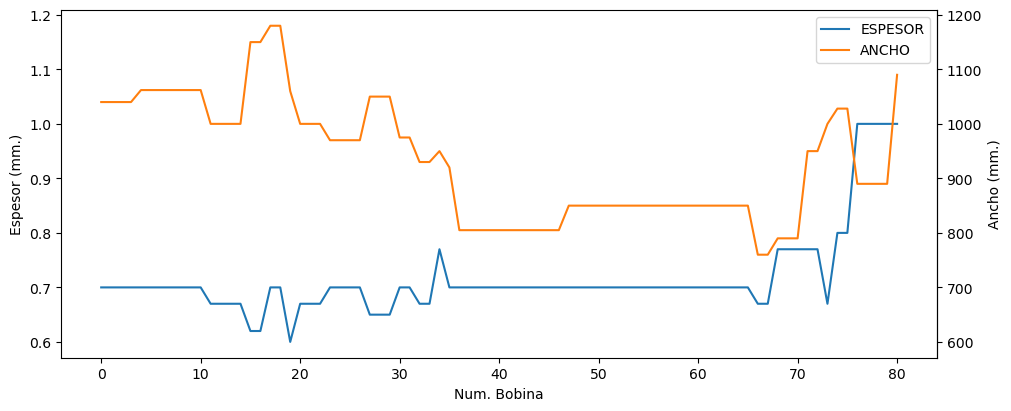

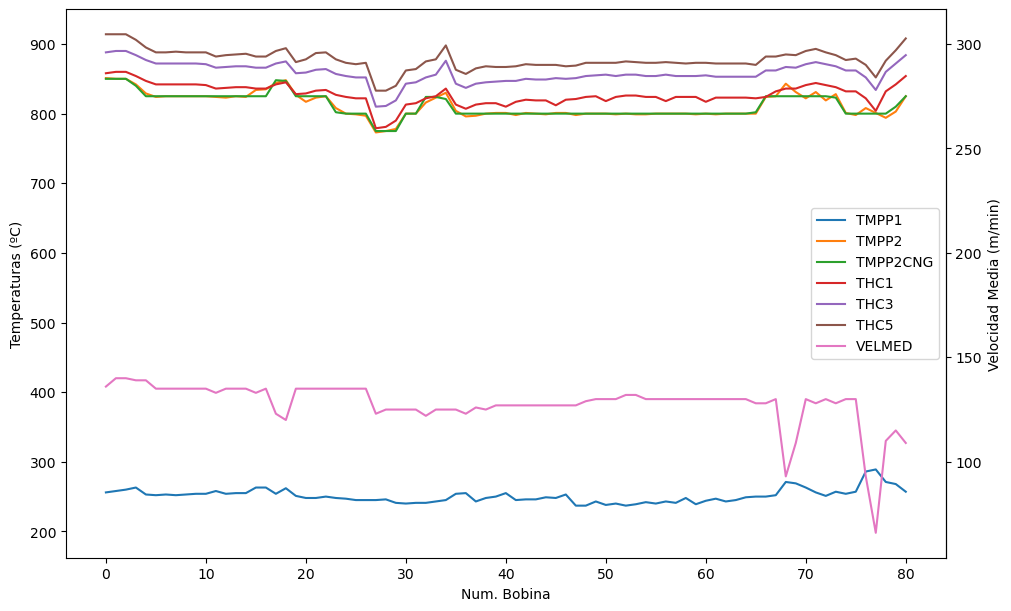

In [ ]:
dibuja_proceso(df_test)

**EJERCICIO: Usando las funciones anteriores, visualice tres momentos concretos donde se produzcan cambios bruscos de velocidad y escribe tus conclusiones. Incluya el codigo que considere necesario para justificar las mismas.**

### Visualización del Punto de Operación (estado del proceso)

Vamos a dibujar el 'punto de operación' (PE) de un proceso para cada instante. El PE de un proceso o sistema es el **estado en el que está el mismo en un momento de terminado**. En el caso del proceso de galvanizado correspondería con la medición instantánea de las variables que influyen en el mismo. (velocidades, temperaturas, dimensiones del producto, etc.). Para la proyección, vamos a eliminar algunas variables muy correladas entre si.

---

**Ver estos videos para profundizar**:
- *A.I. Experiments: Visualizing High-Dimensional Space*: https://www.youtube.com/watch?v=wvsE8jm1GzE
- *StatQuest: PCA step by step*: https://www.youtube.com/watch?v=FgakZw6K1QQ
- *StatQuest: ¡Ideas principales de PCA en solo 5 minutos!*: https://www.youtube.com/watch?v=HMOI_lkzW08

---

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionamos variables eliminando aquellas muy correladas o que no explican el PE
cols_pca = ['ANCHO', 'ESPESOR', 'VELMED', 'TMPP1', 'TMPP2', 'THC1']

# Estandarizamos todas las columnas
scaler = StandardScaler()
scaler.fit(df_train[cols_pca])
df_train_esc = scaler.transform(df_train[cols_pca])
df_test_esc = scaler.transform(df_test[cols_pca])

# Sacamos los dos primeros componentes PCA para usarlos como ejes x e y
pca = PCA(n_components=2)
pca.fit(df_train_esc)
print('Varianza explicada con los dos ejes:',np.sum(pca.explained_variance_ratio_))


Varianza explicada con los dos ejes: 0.6841114606747516


**EJERCICIO: ¿Son suficientes los dos primeros ejes del PCA según la varianza explicada? ¿Qué opinas?**

Text(0.5, 1.0, 'Proyección del Punto de Operación usando PCA')

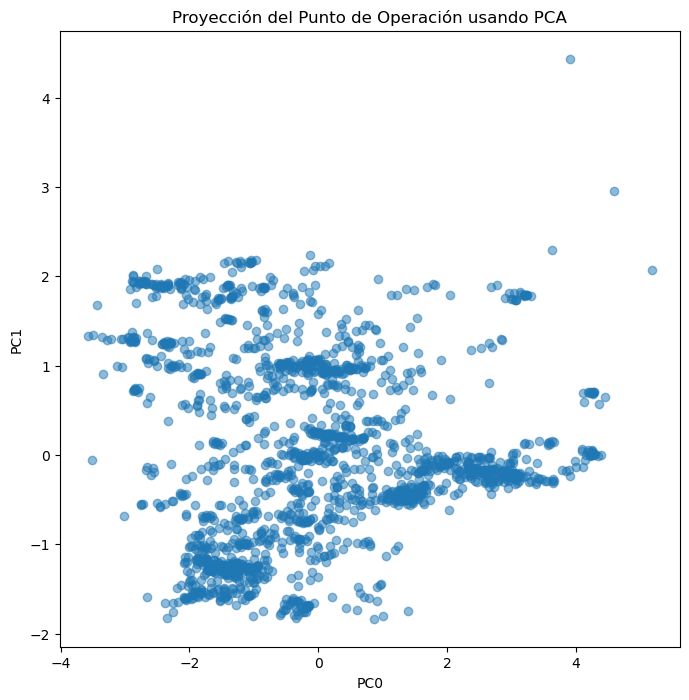

In [ ]:
# Graficamos los puntos de operación proyectados en los dos ejes principales del PCA
proyeccion = pca.transform(df_train_esc)
plt.figure(figsize=(8,8))
plt.scatter(proyeccion[:,0],proyeccion[:,1],alpha=0.50)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Proyección del Punto de Operación usando PCA')

In [ ]:
def saca_flechas(proyeccion, pos_ini=0, nump=10):
    proyec = proyeccion[pos_ini:pos_ini+nump]
    diff_proyec = np.diff(proyec,axis=0)

    plt.figure(figsize=(8,8))
    plt.scatter(proyeccion[:,0],proyeccion[:,1],alpha=0.10)
    plt.xlabel('PC0')
    plt.ylabel('PC1')
    plt.title('Recorrido del Punto de Operación usando PCA')
    for posrow in range(len(diff_proyec)):
        plt.arrow(x=proyec[posrow,0],y=proyec[posrow,1],
                  dx=diff_proyec[posrow,0],dy=diff_proyec[posrow,1],
                  color='red', linewidth=2.0,
                  head_width=0.1, head_length=0.1)

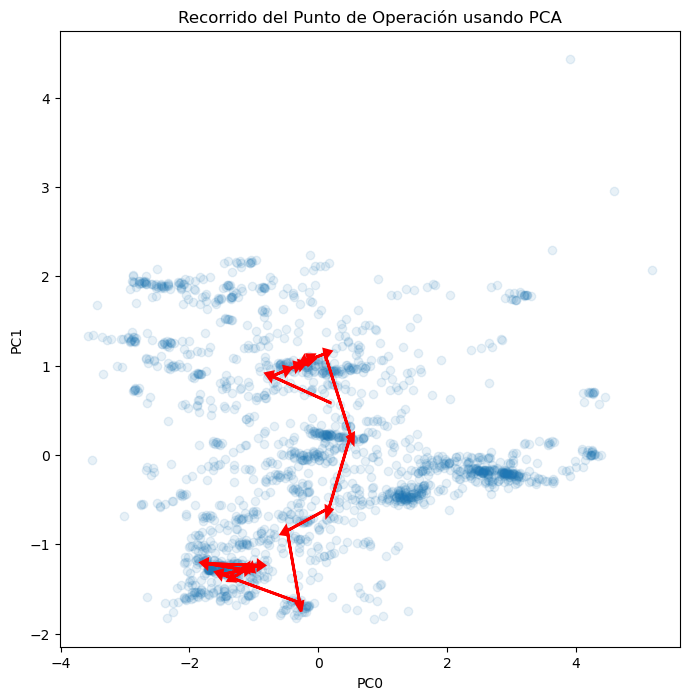

In [ ]:
saca_flechas(proyeccion,pos_ini=1010,nump=20)

**EJERCICIO: Usando las funciones anteriores busque otros dos momentos donde se produzcan cambios bruscos en el punto de operación y muéstralos con la funcion 'saca_flechas()'. Incluya el codigo que consideres necesario para justificar las mismas. Incluya todo (código, gráficas y explicaciones en el informe final)**
    

**EJERCICIO: Cree una nueva función basada en 'saca_flechas()' para poder mostrar los puntos de operación de la base de datos de testeo encima de la proyeccion PCA de los puntos de entrenamiento. ¿Están en una zona diferente? ¿Qué pasaría si es así?**

**EJERCICIO: Use otros tipos de proyecciones (ISOMAP, LLE, MDS, T-SNE, TRIMAP, etc.) para visualizar el punto de operación. Mínimo dos!**

---

**Ver estos videos para profundizar**:
- *Isomap Embedding and LLE Dimensionality Reduction Techniques*: https://www.youtube.com/watch?v=WQP0WCZ_LLo
- *StatQuest: MDS and PCoA*: https://www.youtube.com/watch?v=GEn-_dAyYME
- *StatQuest: t-SNE, Clearly Explained*: https://www.youtube.com/watch?v=NEaUSP4YerM
- *StatQuest: UMAP Dimension Reduction, Main Ideas!!!*: https://www.youtube.com/watch?v=eN0wFzBA4Sc
- *Dimension reduction using Isomap algorithm (non linear dimension reduction)*: https://www.youtube.com/watch?v=ybUZatfAs58
- *PaCMAP: un algoritmo para la reducción de dimensiones*^: https://www.youtube.com/watch?v=sD-uDZ8zXkc&t=492s

---

# ENTREGA

**Todos los pasos realizados deberán ser explicados con detalle en un documento PDF. El nombre del archivo deberá incluir lo siguiente 'PROYECTO2_NombreDelAlumnoSinAcentos.PDF'. Ejemplo: PROYECTO2_PEPITO_PEREZ.PDF**

Si usas Colab, recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.